In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic


## 2- Non-Positional Encodings for Third Variables

In [3]:
# We have taken a random subset of 200 cars to reduce over plotting and combine that with a small amount of horizontal jitter
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

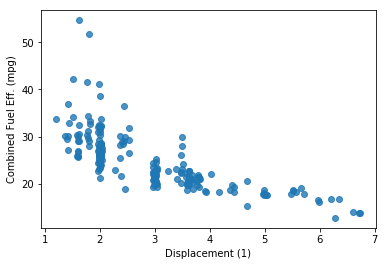

In [4]:
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Are there differences between cars with automatic transmission and manual trans in terms of fuel efficiency and engine size?

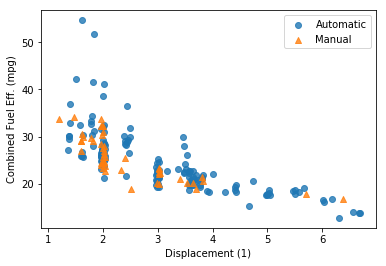

In [5]:
# Since transmission type is categorical, Shape is a Good encoding to use --> use marker, it is take one value so we should
#   create a loop

ttype_markers = [['Automatic', 'o'],
                 ['Manual', '^']]
for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb',
               x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

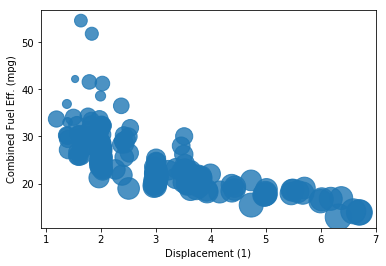

In [6]:
# Another example, Since CO2 is numeric, one encoding we could use is marker size --> use s prameter

sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False, #s = 'co2'
           scatter_kws = {'s' : fuel_econ_subset['co2']});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

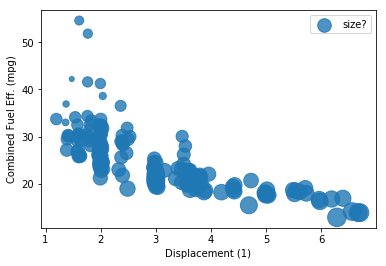

In [7]:
# Reduce the marker size, so we can see more of the points

sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False, #s = 'co2'
           scatter_kws = {'s' : fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['size?']);

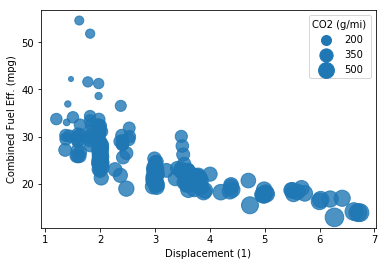

In [8]:
# Solve legend issue

sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False, #s = 'co2'
           scatter_kws = {'s' : fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s/2, color = base_color))
    

plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

## 3- Color Palettes

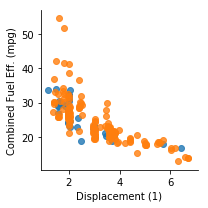

In [9]:

g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type')
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

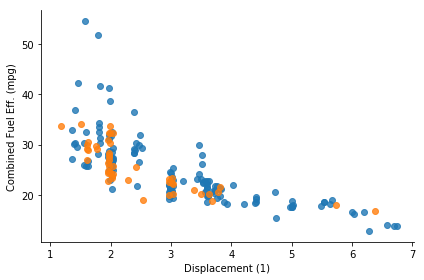

In [10]:
# Let's make a few tweaks to the plot.
# First, let's change the order in which the levels are plotted so that the manual trans points are plotted on the top of auto


g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type',
                 hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

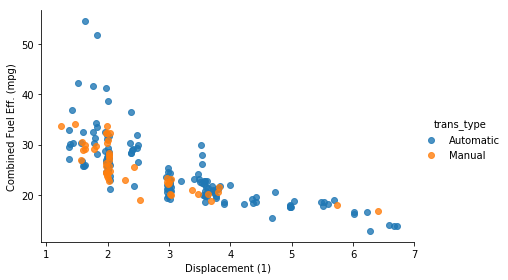

In [11]:
# Finally, let's use the facet grid object method add legend

g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type',
                 hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

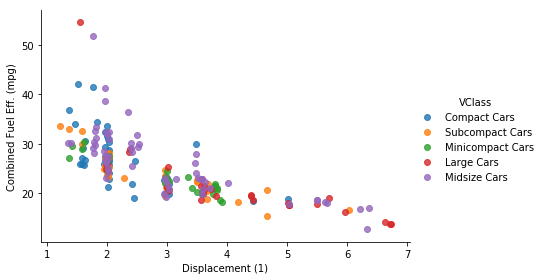

In [12]:
# VClass is an ordered variable, so the qualitative palette doesn't work quite as well

g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass',
                 height = 4, aspect = 1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

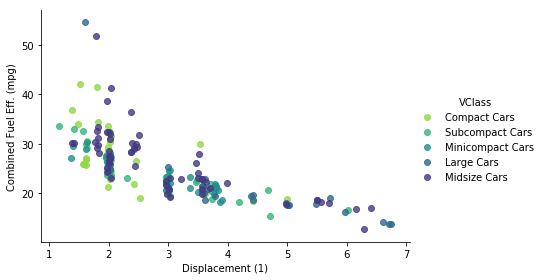

In [13]:
# VClass is an ordered variable, so the qualitative palette doesn't work quite as well
# We should specify a sequential palette instead
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass',
                 height = 4, aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

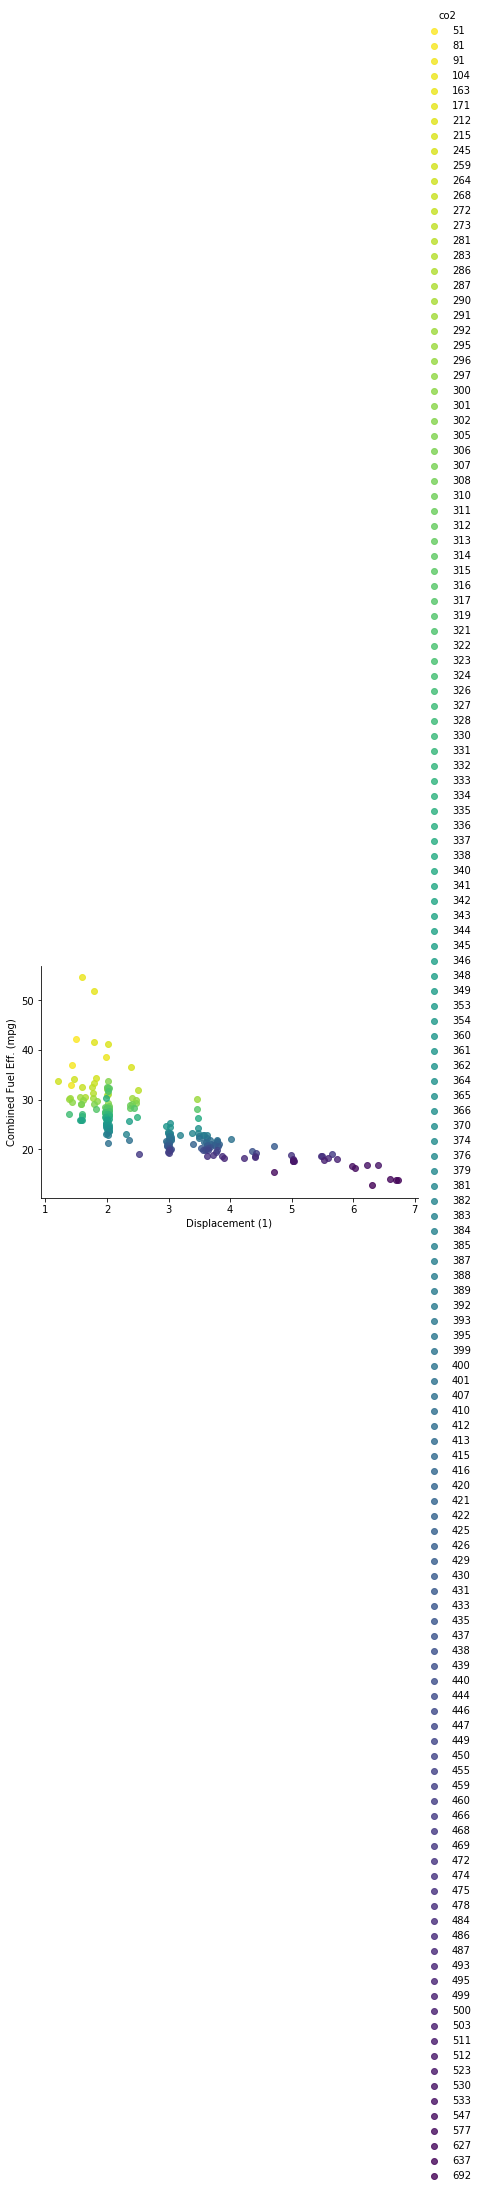

In [14]:
# What if we have a numeric variable instead, like CO2 emissions?

g = sb.FacetGrid(data = fuel_econ_subset, hue = 'co2',
                 height = 4, aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

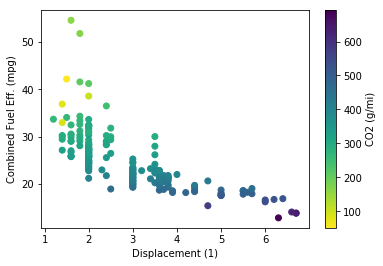

In [15]:
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb' , c = 'co2', cmap = 'viridis_r')
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## 5- Faceting in Two Dimentions

In [16]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


In [17]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [18]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

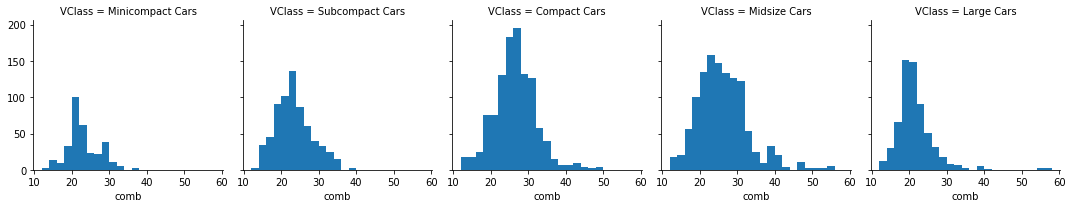

In [19]:
# Previously

bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass');
g.map(plt.hist, 'comb', bins = bins);

Faceting can be extended to multivariate cases by having each facet be a bivariate plot instead

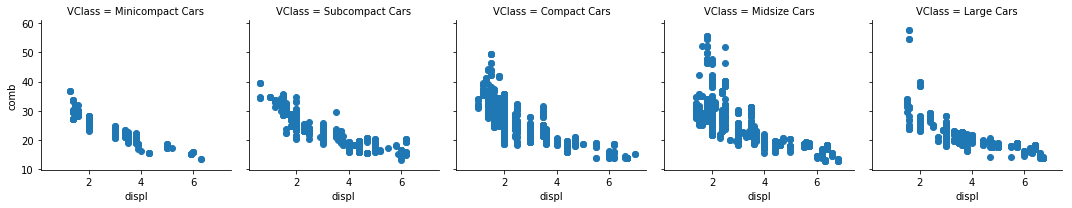

In [20]:
# We can just change the mapping parameters, a scatter plot instead of hist, and two axes variables instead of one
g = sb.FacetGrid(data = fuel_econ, col = 'VClass');
g.map(plt.scatter,'displ', 'comb');

> You can see the efficiency outliers and the compact, midsize, and large classes, as well as the slight bias to/towards smaller engines in the mini and subcompact car classes

We are not limited to only facet by one variable either 

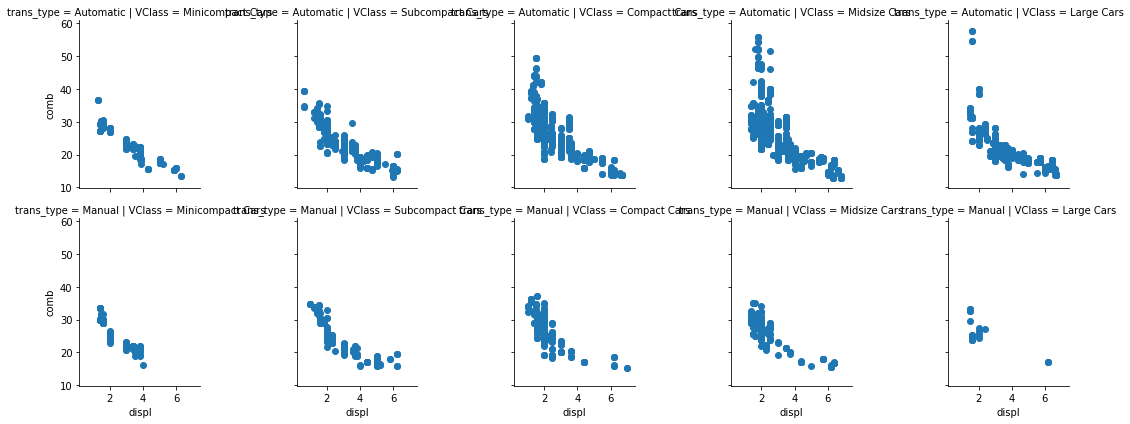

In [21]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type');
g.map(plt.scatter,'displ', 'comb');

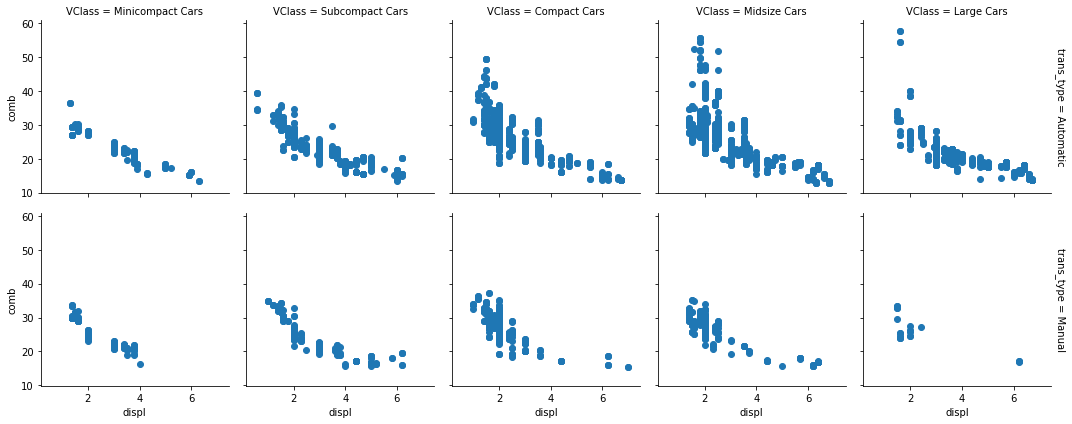

In [22]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type',
                 margin_titles = True);
g.map(plt.scatter,'displ', 'comb');

## 6- Other Adaptations of Bivariate Plots

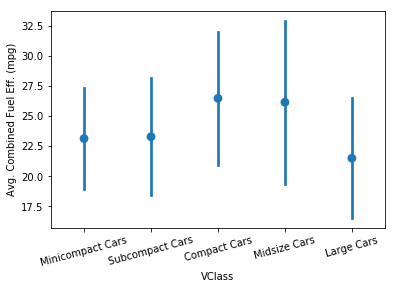

In [23]:
# Previously,
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb',
             ci = 'sd', linestyles = "");
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

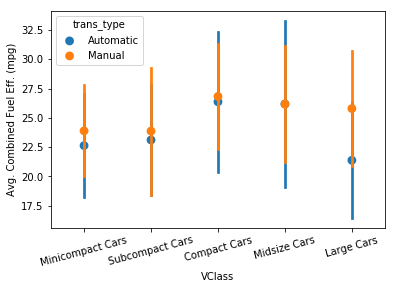

In [24]:
# Let's extend this bivariate plot of fuel efficiency against the vehicle class into a multivariate plot,
#   By adding trans type
#      Just add hue

sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb',
             hue = 'trans_type', ci = 'sd', linestyles = "");
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

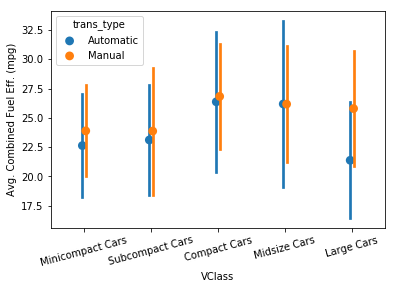

In [25]:
# Since the dots and bars overlapping, we should add dodge = True to offset the two levels slightly.

sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb',
             hue = 'trans_type', ci = 'sd', linestyles = "", dodge = True);
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

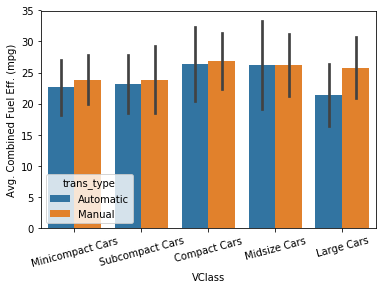

In [26]:
# Alternativly, we can change the point plot into a bar plot function
#   To get an adapted clustered bar chart
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
            hue = 'trans_type', ci = 'sd');
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

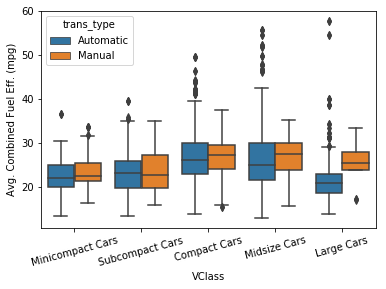

In [27]:
# Even further we can take one more step back on the summarization levels and use the box plot function to get a clustered box

sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
            hue = 'trans_type');
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

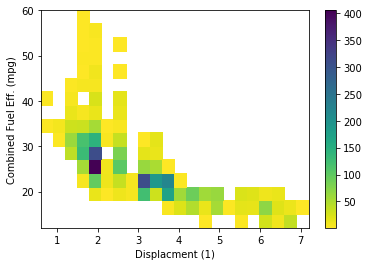

In [28]:
# We can also adapt heat maps, so instead of color being based on count, color is based on the mean of a third variable

bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [29]:
# let's change the plot above



In [30]:
# Our first step is to figure out in which bin each point falls
#   We compute this using the pandas cut function
#      In addition to the arguments you have seen before the labels = False argument is added so that the bins are 
#           identified numerically and we apply astype to make the indexing later easier


displ_bins = pd.cut(fuel_econ['displ'], bins_x, right = False, include_lowest = False,
                    labels = False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right = False, include_lowest = False,
                   labels = False).astype(int)

In [31]:
displ_bins

0       10
1        4
2       10
3       10
4        6
5        9
6        9
7        4
8        4
9       10
10      10
11       4
12      10
13       9
14      10
15      10
16       9
17       9
18       9
19       9
20      10
21      10
22      14
23      14
24      10
25       3
26       3
27       3
28       4
29       4
        ..
3899     3
3900     3
3901     6
3902     4
3903     4
3904    14
3905     4
3906     9
3907     9
3908     9
3909     8
3910    12
3911     6
3912     4
3913     0
3914     0
3915     4
3916     6
3917     6
3918     6
3919     4
3920     4
3921     4
3922     9
3923     9
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int32

In [32]:
# Next, we count up the number of points that fall in each bin

n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points

displ  comb
0      7         3
       9         3
1      6         4
       7         8
2      5        42
       6        62
       7        31
       8        15
       9         7
       10        4
3      3         6
       4        55
       5       130
       6       119
       7        34
       8         7
       10        7
       11        2
       12        4
       13        1
       14        2
       15        2
4      2        15
       3        98
       4       405
       5       311
       6       145
       7        55
       8        14
       9        26
              ... 
9      6        18
10     1         5
       2       173
       3       219
       4         2
11     1        22
       2        58
       3         4
12     1        48
       2        92
13     0         1
       1        15
       2        59
14     1        55
       2        64
15     1         4
16     0         3
       1        17
       2        24
17     1        16
       2        20


In [33]:
# This multiindex series is kind of hard to work with, so we will use reset index and pivot to put the counts in array form
#     Finally, we use the value attributes to get the number of points as an array
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values
n_points

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  42.,  62.,  31.,  15.,   7.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  55., 130., 119.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15.,  98., 405., 311., 145.,  55.,  14.,  26.,   6.,
         10.,   3.,   3.,   5.,  nan],
       [ nan,  nan,   1.,  12.,   9.,  nan,   5.,   1.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  11.,  37., 105.,  82.,  37.,   5.,  15.,  17.,  nan,
          1.,  nan,   1.,  nan,  nan],
       [ nan,  nan,   7.,   6.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan, 123., 311.,  64.,  17.,   2.,  nan,  nan,  nan,  nan,
         nan,  nan,  n

In [34]:
# Now we can get our point weights using all of these values
#    We take the CO2 series and devide each element by the number of points in each bin 
#        Using the cut bins vactors for indexing into the right places
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]
co2_weights

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
5        2.068421
6        2.168421
7       28.800000
8        3.826531
9        2.664740
10       1.917808
11       0.888889
12       2.450867
13      13.937500
14       1.926941
15       2.676301
16      13.312500
17      13.937500
18      13.312500
19       2.078947
20       1.762557
21       1.840183
22       6.843750
23       7.390625
24       1.789954
25       2.445378
26       2.378151
27       2.344538
28       1.958621
29       1.958621
          ...    
3899     2.462185
3900     2.369231
3901    43.363636
3902     0.809877
3903     3.806122
3904     7.265625
3905     0.851852
3906     2.221053
3907     2.042105
3908     2.221053
3909    20.058824
3910    10.854167
3911     3.238095
3912     1.028939
3913     9.666667
3914     9.666667
3915     0.827160
3916     4.000000
3917     3.682927
3918     3.190476
3919     1.482759
3920     0.993569
3921     0.881481
3922    22.428571
3923     6

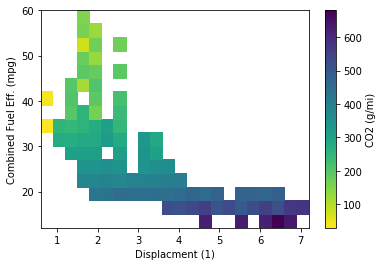

In [35]:
# We add the weights to the weights parameter, and then a label to the color bar, and we have got a heat map plot that
     # looks inline with the colored scatter plot that we made earlier in the lesson

bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y], weights = co2_weights);

plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar(label = 'CO2 (g/mi)');

## 8- Plot Matrices

In [38]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


Let's say that we are interested in looking at the pairwise relationships between the six combat statistics for all pokemon as seen in the last six columns. Rather than plot scatter plots one-by-one, we can inspect them all simultaneously using a plot matrix.

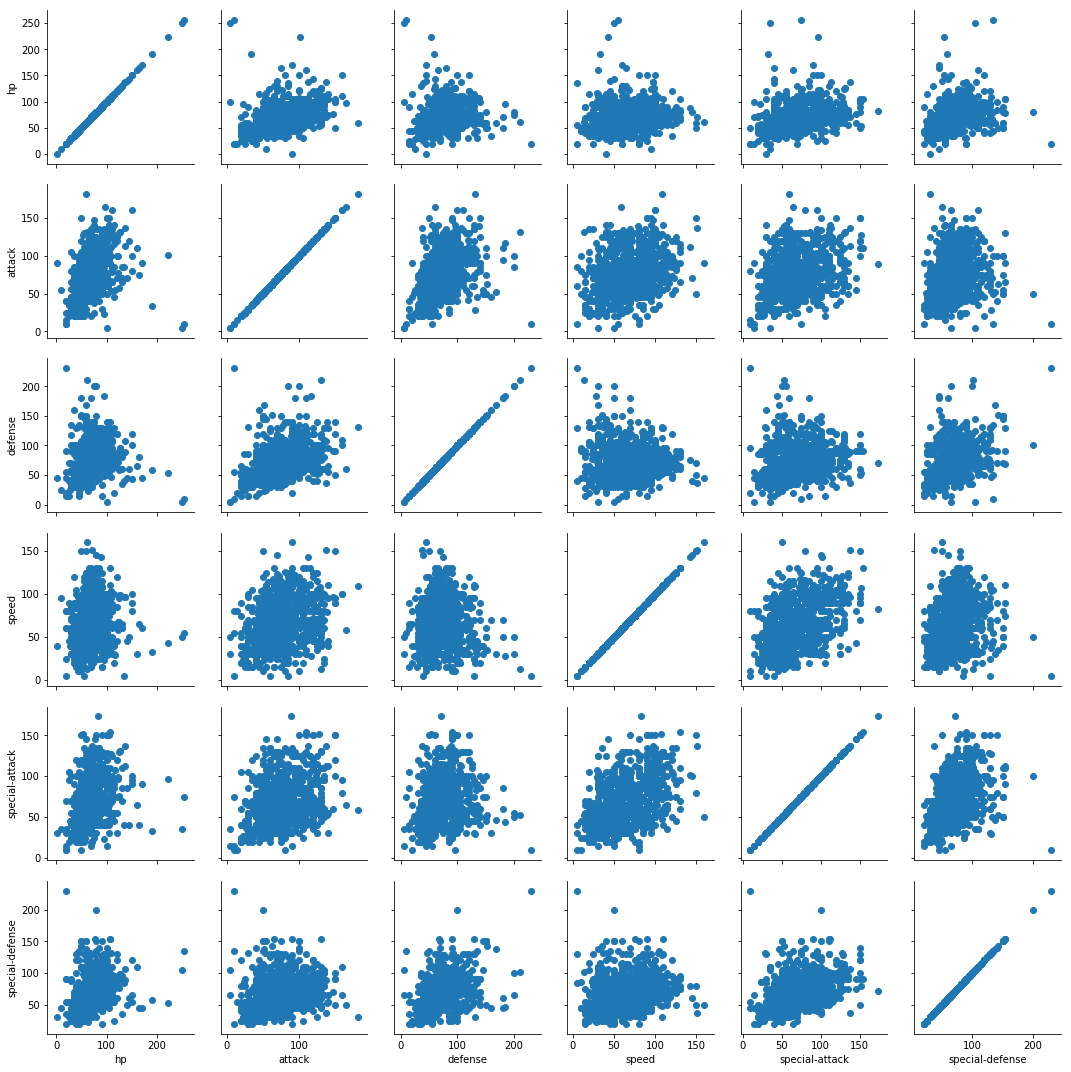

In [40]:
# This can be done with seaborn PairGrid function 

pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats)

# Since all of the variables are numeric, let's put a scatter plot in each cell.
g.map(plt.scatter);

> You will notice that every cell now includes a scatter plot, including those in the diagonals.
<br></br>
> These diagonals are just stright lines since the column and row variables match up.

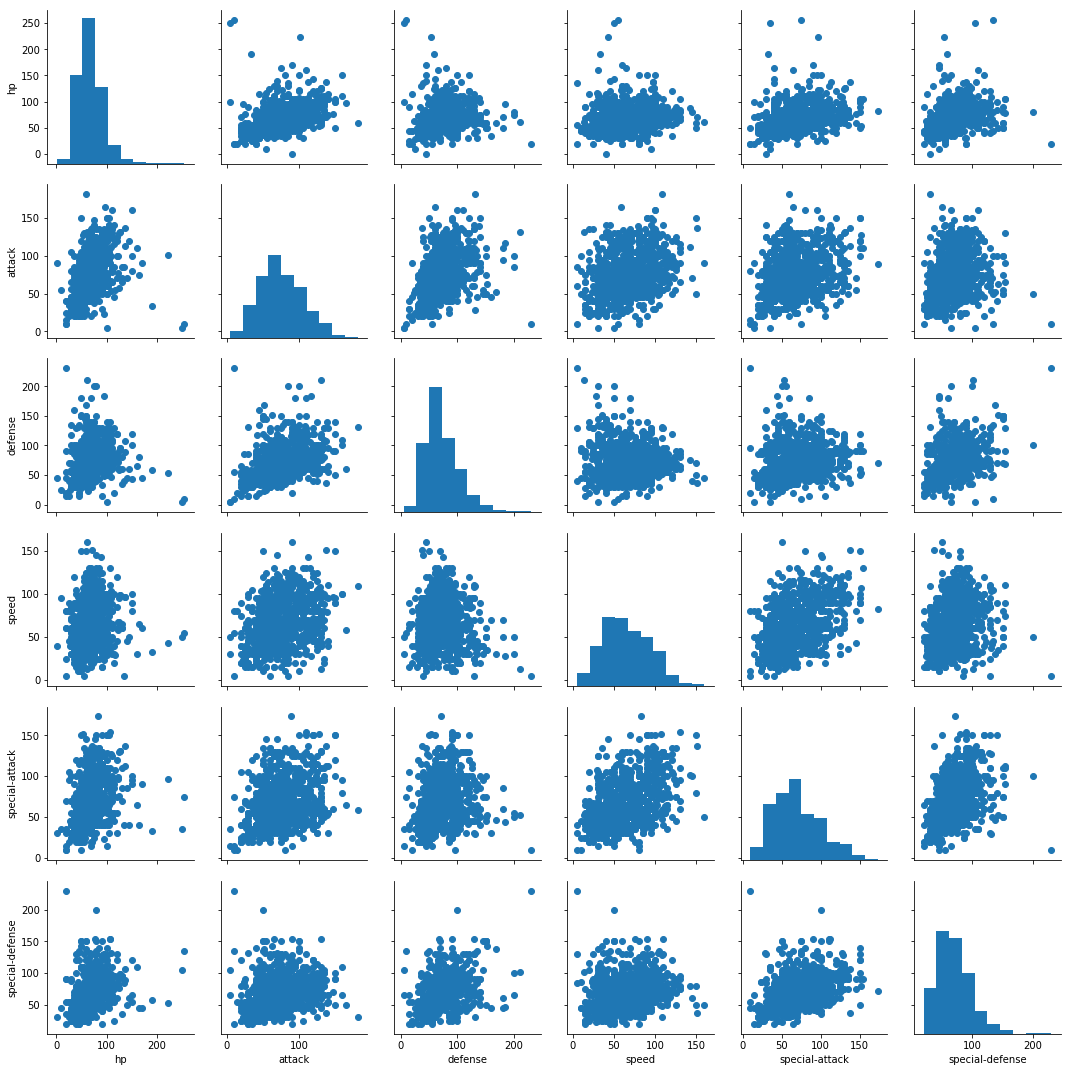

In [42]:
# Let's use the map diag method to put histograms on the diagonal,

pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats)
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

We can see some stronger relationships between hp and attack, attack and defense, special-attack and special-defense.

In [43]:
# let's check this numerically by computing and plotting the correlations in a correlation heat map
#    The cor finction returns a matrix of pairwise correlation between our selected variables
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


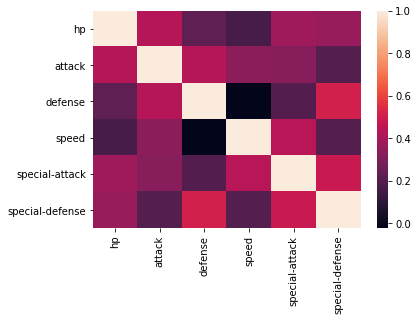

In [44]:
# Putting this into heat map function produces our desired visualization
sb.heatmap(pokemon[pkmn_stats].corr());

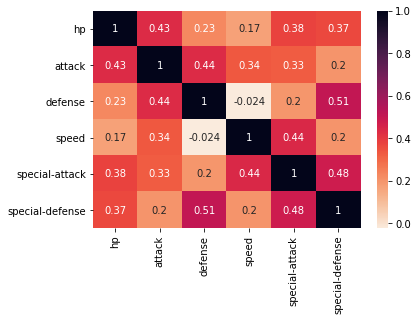

In [45]:
# Let's add some parameters to the heat map
    # Reverce the color palette using cmap, then
         # add annotation to format the values with two decimal places
sb.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True);

> It looks like there is only one correlation that is negative between defence and speed.
<br></br>
> Since it is essentially zero, let's add a vmin argument to set the lower bound of the colormap to zero.

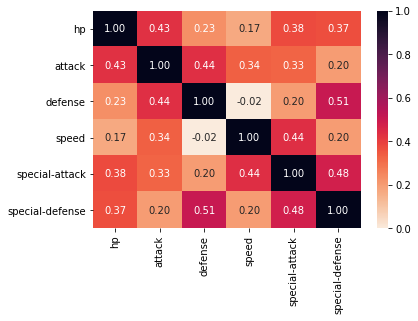

In [48]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True,
           fmt = '.2f', vmin = 0);

The correlation heatmap supports the observations we made from the **plot matrix.** We see that there are relatively high correlation values between `hp` and `attack`, `attack` and `defense`, `special-attack` and `special-defense`.
But it looks like there is a **surprisingly** high correlation between `defense` and `special-defense`.
Looking back on the **plot matrix**, perhaps that **outlier** in the upper right is **boosting** the statistic.
That point would be worth **further investigation** in a deeper dive.

## 9- Feature Engineering
feature engineering is an option when performing an investigation into our data

In [49]:
# We are going to look an example of biases Pokemon creatures statistics,
    # We want to know if a creature's offensive stats are biased towards physical or special-attack,
        # if their defenseive stats are similarly biased towards pysical or special-defense
            # First, we will create new variables based on ratios.

pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

# if the creature has avalue > 1 , then they favored physical side, and if < 1 , they favor the special sides.
            

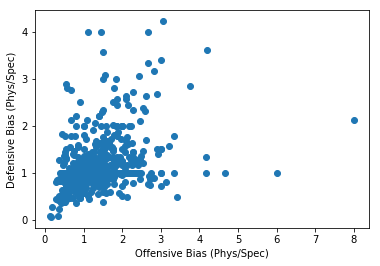

In [51]:
# The basic scatter plot looks like this
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio')
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');

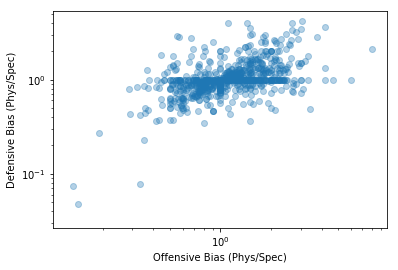

In [52]:
# Let's polish things up by adding some transparency and then changing the axis scales to log scales
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');
plt.xscale('log')
plt.yscale('log')
# That way a bias of two to one is evenly spaced from the even ratio of one in both the physical and special directions.

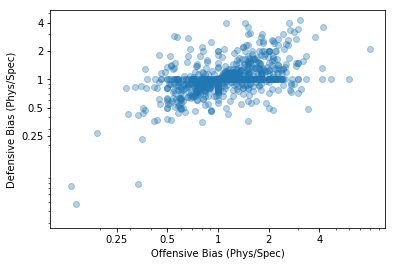

In [53]:
# Next, we will add some tick marks appropriate for a log scale
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc);

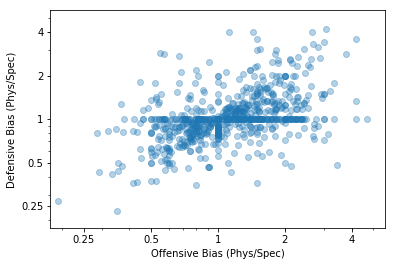

In [54]:
# Finally, we will set the axis limits to remove the extreme outliers.
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc);
plt.xlim(2 ** -2.5, 2 ** 2.5)
plt.ylim(2 ** -2.5, 2 ** 2.5);

# These particular limits also centered the plot on one on both axes

> In this final plot we see that most points seem to fall along a diagonal line.
<br></br>
> In the upper right-hand quadrant, we have Pokemon species that are physical biased in both offense and defense, 
<br></br>
> And in the lower left-hand quadrant, they are special biased in both offense and defense .
<br></br>
<br></br>
> Interestingly, there appears to be a large number of Pokemon on the y equals one line showing no defense bias.
<br></br>
> These pokemon have a wide range of offensive biases.
<br></br>
> There appeared to be much fewer Pokemon on the x equals one line showing no offensive bias.

Findings like these would be difficult to come by and summarize if we didn't build our engineered features.